In [1]:
# Keep plots inline in Jupyter Notebook

import numpy as np
%matplotlib inline

In [ ]:
# Importing Pandas for data manipulation and analysis
# Loading the Taxi trip dataset using Pandas

import pandas as pd
Taxi_data_set = pd.read_csv('Data_set/Taxi_Trip.csv')

In [3]:
# Printing the first 5 rows of the data set

Taxi_data_set.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [4]:
# Printing information on the data set

Taxi_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [ ]:
# Droping the some column as it is not needed for analysis 

Taxi_data_set.drop(columns=['User ID', 'User Name', 'Driver Name', 'key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'jfk_dist', 
                           'ewr_dist', 'lga_dist'], inplace=True)

In [6]:
# Function to count the total number of negative values in a specified features

def count_negative_values(df, column_name):

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")
    
    if pd.api.types.is_numeric_dtype(df[column_name]):
        return (df[column_name] < 0).sum()
    else:
        print(f"Column '{column_name}' is not numeric. Skipping.")
        return None

In [7]:
# Counting the number of negative values in specified features
features = ['fare_amount', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'year', 'sol_dist', 'nyc_dist', 'distance']

for column in features:
    print('Number of Negative values in column {} is : {}'.format(column, count_negative_values(Taxi_data_set, column)))

Number of Negative values in column fare_amount is : 21
Number of Negative values in column passenger_count is : 0
Number of Negative values in column hour is : 0
Number of Negative values in column day is : 0
Number of Negative values in column month is : 0
Number of Negative values in column weekday is : 0
Number of Negative values in column year is : 0
Number of Negative values in column sol_dist is : 0
Number of Negative values in column nyc_dist is : 0
Number of Negative values in column distance is : 0


In [ ]:
# Dropping negative values in fare_amount feature

Taxi_data_set.drop(Taxi_data_set[Taxi_data_set['fare_amount'] < 0].index, inplace=True)

In [9]:
# Checking for missing values

Taxi_data_set.isnull().sum()

Car Condition        0
Weather              0
Traffic Condition    0
fare_amount          0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [10]:
# Filling missing data set in some features

Taxi_data_set['sol_dist'] = Taxi_data_set['sol_dist'].fillna(Taxi_data_set['sol_dist'].mean())
Taxi_data_set['nyc_dist'] = Taxi_data_set['nyc_dist'].fillna(Taxi_data_set['nyc_dist'].mean())
Taxi_data_set['distance'] = Taxi_data_set['distance'].fillna(Taxi_data_set['distance'].mean())
Taxi_data_set['bearing'] = Taxi_data_set['bearing'].fillna(Taxi_data_set['bearing'].mean())

In [11]:
# Checking for duplicate rows in the dataset

print(sum(Taxi_data_set.duplicated()))

0


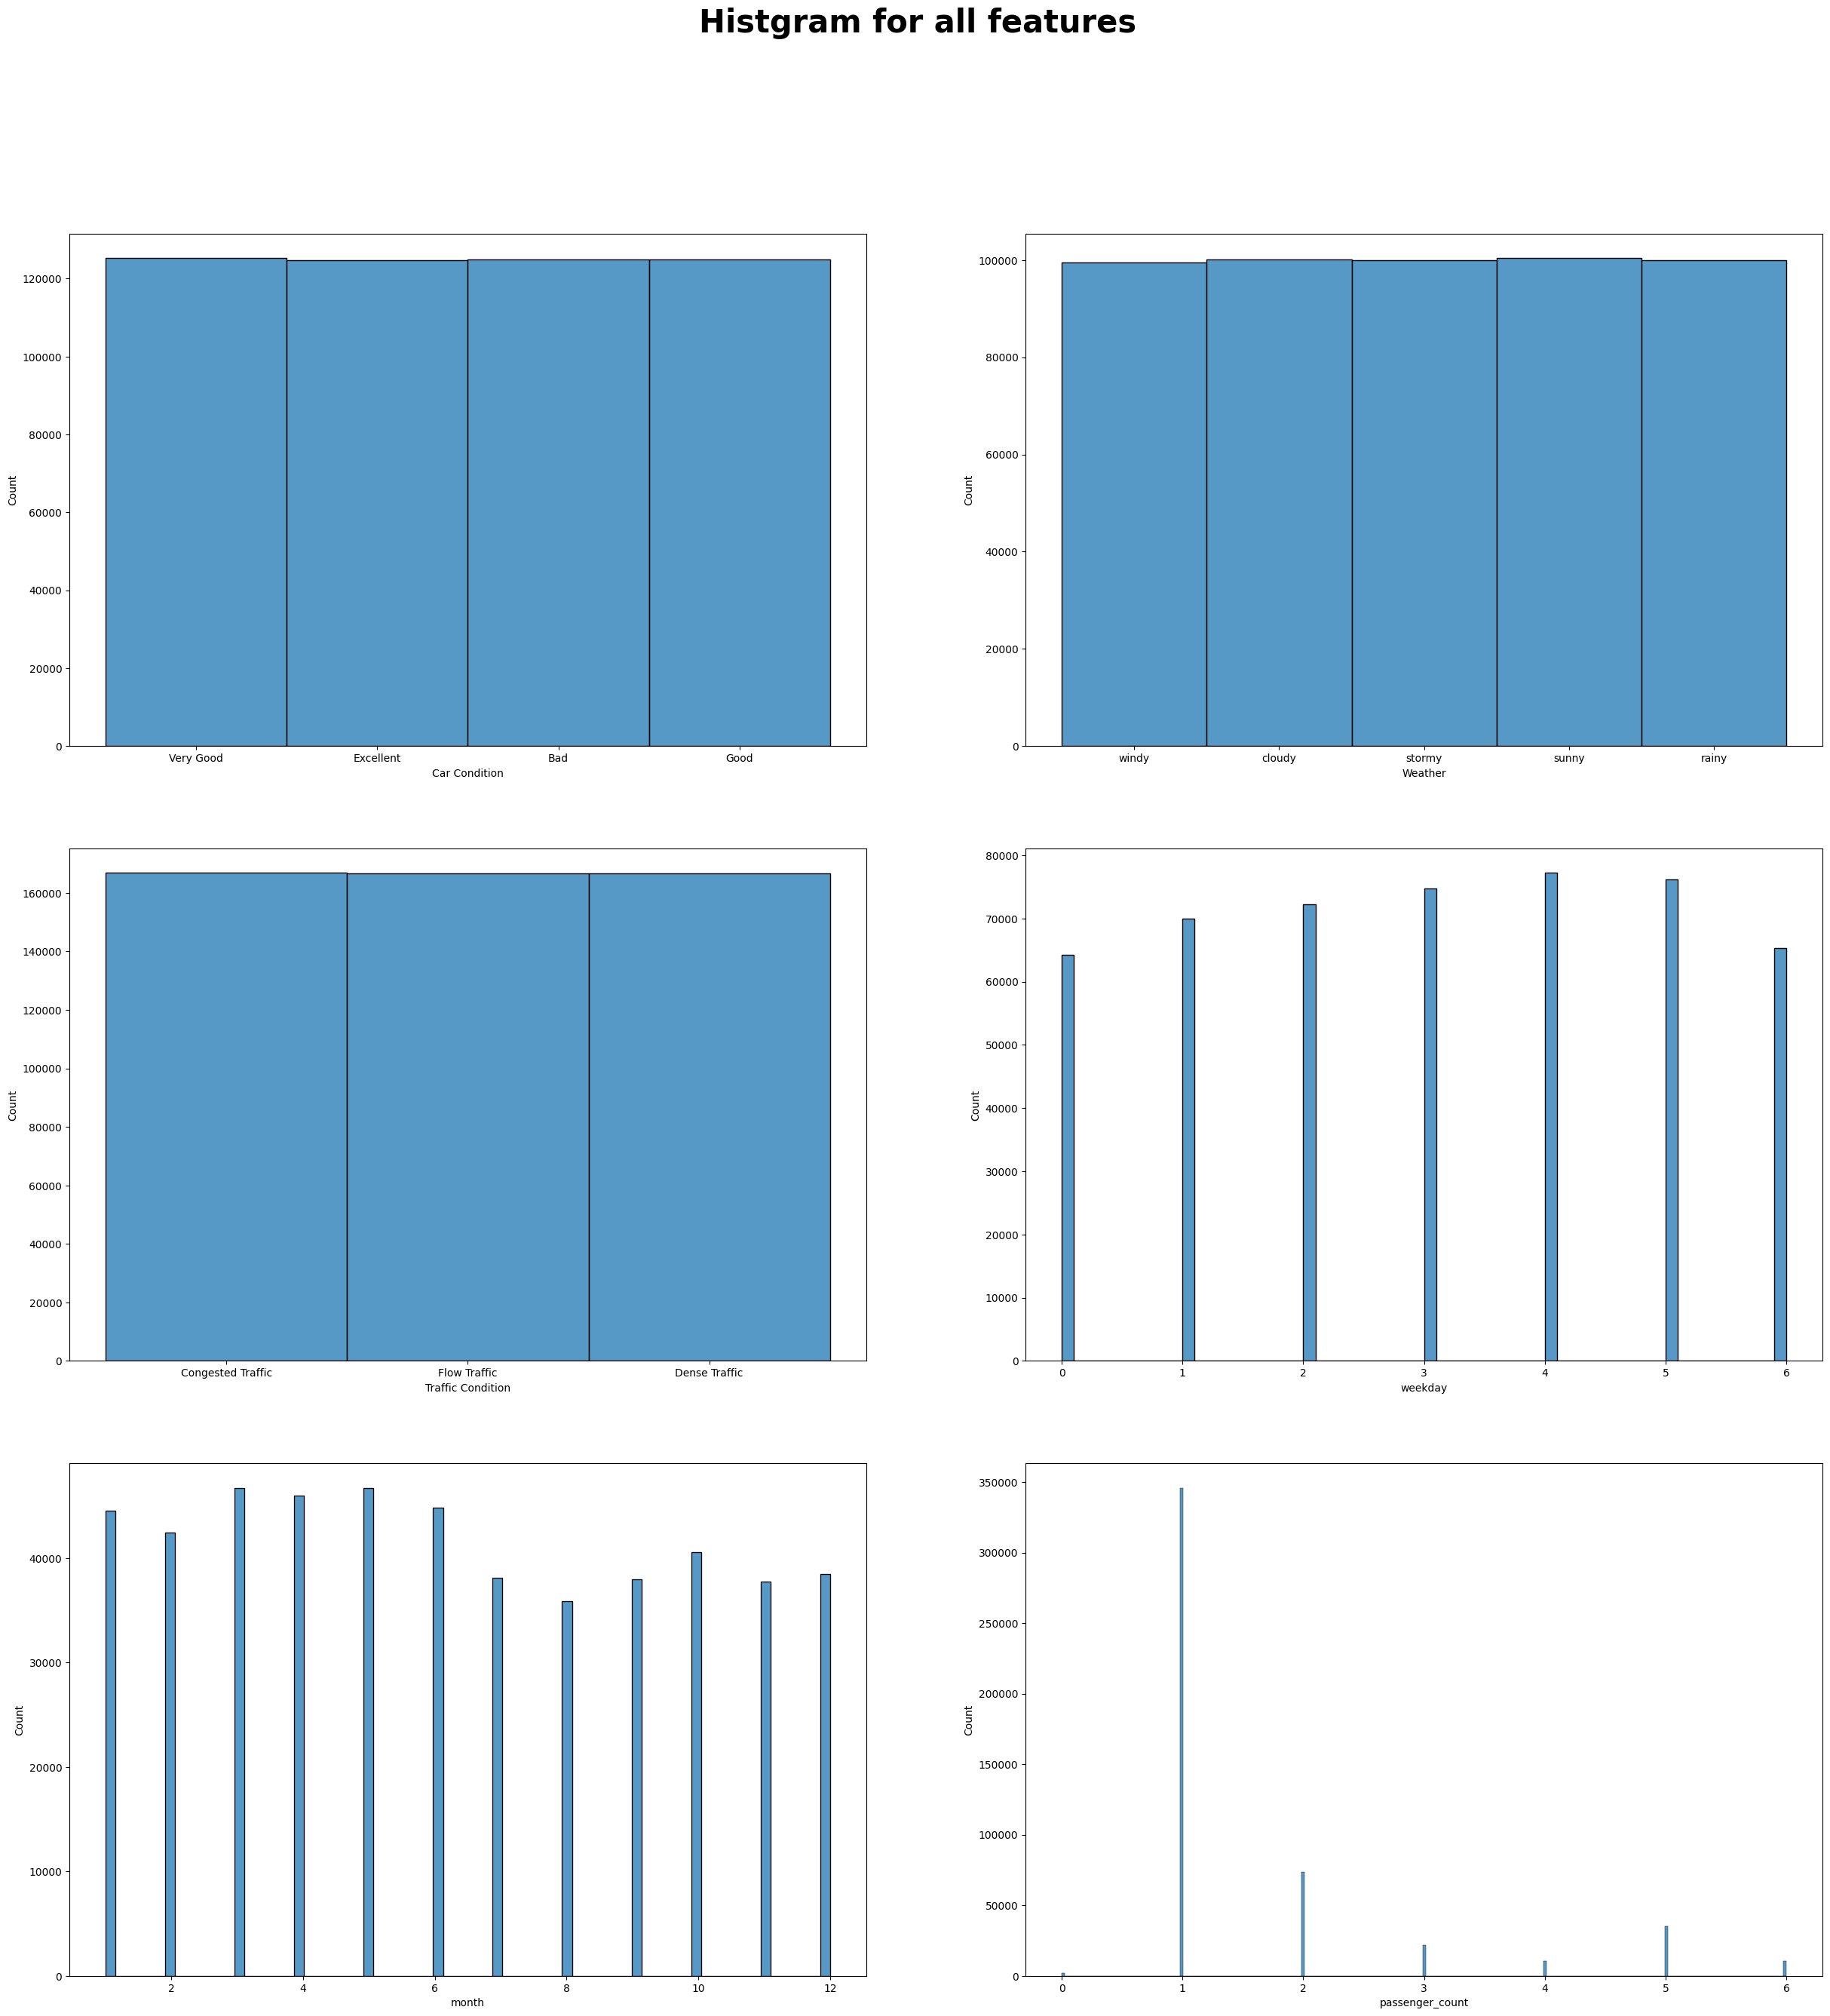

In [ ]:
# Importing Matplotlib for plotting graphs
# Importing Seaborn for statistical data visualization
# Plotting histograms for some features in the dataset

import matplotlib.pyplot as plt
import seaborn as sns

features = ['Car Condition', 'Weather', 'Traffic Condition', 'weekday', 'month', 'passenger_count']
counter = 0

plt.figure(figsize = (30, 30))
plt.suptitle("Histgram for all features",fontweight = "bold", fontsize = 30)
for feature in features:
    counter = counter + 1
    plt.subplot(3,2,counter)
    sns.histplot(Taxi_data_set[feature])

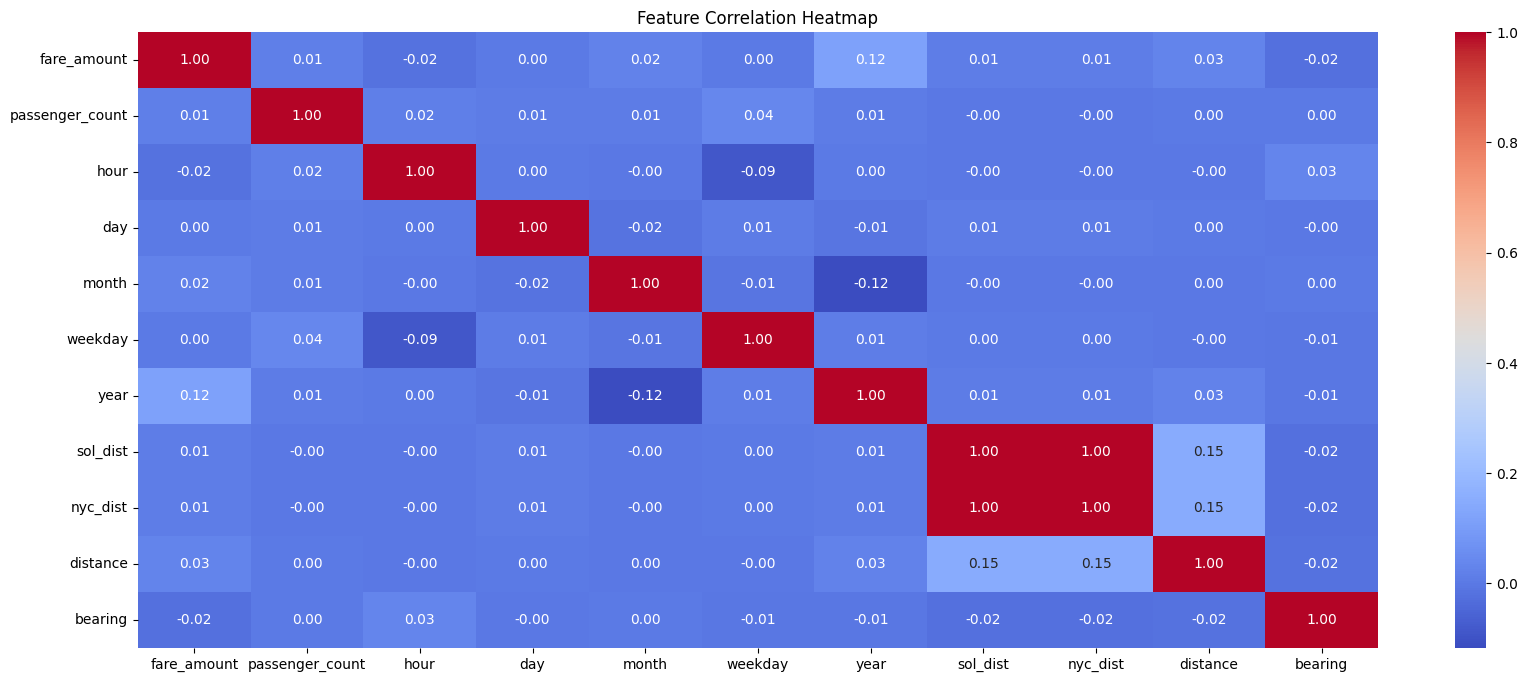

In [13]:
# Plotting the correlation heatmap

correlation_matrix = Taxi_data_set.select_dtypes(include=[float, int]).corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [14]:
# Function to detect outliers

def detect_outliers(df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for the data
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    no_of_outliers = sum((df[column_name] < lower_bound) | (df[column_name] > upper_bound))
    return no_of_outliers

In [15]:
# Function to remove outliers in a specified column

def remove_outliers_rows(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df

In [16]:
# Function to cap outliers in a specified column

def cap_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column_name] = np.where(df[column_name] < lower_bound, lower_bound,
                               np.where(df[column_name] > upper_bound, upper_bound, df[column_name]))
    return df

In [17]:
# Return the number of outliers

features = ['bearing', 'fare_amount', 'distance', 'passenger_count']
for feature in features:
    print('Number of outliers in column {} is : {}'.format(feature, detect_outliers(Taxi_data_set, feature)))

Number of outliers in column bearing is : 0
Number of outliers in column fare_amount is : 43322
Number of outliers in column distance is : 41927
Number of outliers in column passenger_count is : 56523


In [18]:
# Cap outliers in specified features

cap_outlier_features = ['fare_amount', 'distance', 'passenger_count']

for feature in cap_outlier_features:
    hotel_data_set = cap_outliers(Taxi_data_set, feature)

In [19]:
# Define valid ranges
valid_hours = Taxi_data_set['hour'].between(0, 23)
valid_days = Taxi_data_set['day'].between(1, 31)
valid_months = Taxi_data_set['month'].between(1, 12)

# Combine all valid conditions
valid_mask = valid_hours & valid_days & valid_months

# Filter the dataset
Taxi_data_set = Taxi_data_set[valid_mask].reset_index(drop=True)

In [20]:
# Preparing the data for modeling

X = Taxi_data_set.drop(columns = ['fare_amount'], axis = 1)
Y = Taxi_data_set['fare_amount']

In [21]:
# Importing train_test_split to split the data into training and testing sets
# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [22]:
# Label encode categorical features

custom_mapping_car = {'Very Good': 2, 'Bad': 0, 'Good': 1, 'Excellent': 3}
X_train['Car Condition']= X_train['Car Condition'].map(custom_mapping_car)

custom_mapping_weather = {'sunny': 4, 'cloudy': 3, 'rainy': 1, 'stormy': 0, 'windy': 2}
X_train['Weather']= X_train['Weather'].map(custom_mapping_weather)

custom_mapping_traffic = {'Congested Traffic': 0, 'Dense Traffic': 1, 'Flow Traffic': 2}
X_train['Traffic Condition']= X_train['Traffic Condition'].map(custom_mapping_traffic)

In [23]:
# Checking for skewness in the dataset

print(X_train.skew())

Car Condition        0.000432
Weather             -0.000922
Traffic Condition    0.001920
passenger_count      1.394791
hour                -0.435884
day                  0.020413
month                0.111039
weekday             -0.041501
year                 0.066133
sol_dist             7.186130
nyc_dist             7.186358
distance             1.054647
bearing             -0.021023
dtype: float64


In [24]:
# Importing PowerTransformer to handle skewness
# Applying Power Transformation to reduce skewness

from sklearn.preprocessing import PowerTransformer


pt = PowerTransformer(method='yeo-johnson')

X_train[['passenger_count', 'sol_dist', 'nyc_dist', 'distance']] = pt.fit_transform(X_train[['passenger_count', 'sol_dist', 'nyc_dist', 'distance']])

In [25]:
# Checking for skewness in the dataset after Power Transformation

print(X_train.skew())

Car Condition        0.000432
Weather             -0.000922
Traffic Condition    0.001920
passenger_count     -0.247050
hour                -0.435884
day                  0.020413
month                0.111039
weekday             -0.041501
year                 0.066133
sol_dist            -0.097510
nyc_dist            -0.332751
distance             0.009531
bearing             -0.021023
dtype: float64


In [26]:
# Saving the trained PowerTransformer model to a file
import pickle

pickle.dump(pt, open('Trained_models/Power_Transformer.pkl', 'wb'))

In [27]:
# Importing StandardScaler to standardize the features
# Data Standrization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [28]:
# Saving the trained StandardScaler model to a file

pickle.dump(scaler, open('Trained_models/Scaler.pkl', 'wb'))

In [29]:
# Importing Variance Inflation Factor to check for multicollinearity
# Function to calculate Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    if isinstance(df, np.ndarray):
        df = pd.DataFrame(df)
    numeric_df = df.select_dtypes(include=[float, int])
    vif_data = pd.DataFrame()
    vif_data['feature'] = numeric_df.columns
    vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
    return vif_data

In [30]:
# Calculating VIF for the training data

vif_df = calculate_vif(X_train)
print(vif_df)

    feature        VIF
0         0   1.000032
1         1   1.000044
2         2   1.000024
3         3   1.004202
4         4   1.010775
5         5   1.000486
6         6   1.014851
7         7   1.013082
8         8   1.015271
9         9  13.650467
10       10  13.682959
11       11   1.033039
12       12   1.003868


In [31]:
from sklearn.decomposition import PCA

data_pca_1 = X_train[:,[9, 10]]

pca_1 = PCA(n_components = 1)

pc_1 = pca_1.fit_transform(data_pca_1)

X_train = np.delete(X_train, [9,10], axis = 1)

X_train = np.hstack((X_train, pc_1))

In [ ]:
# Calculating VIF after PCA

vif_df = calculate_vif(X_train)
print(vif_df)

    feature       VIF
0         0  1.000031
1         1  1.000042
2         2  1.000022
3         3  1.004201
4         4  1.010474
5         5  1.000483
6         6  1.014848
7         7  1.013075
8         8  1.015271
9         9  1.004423
10       10  1.003683
11       11  1.002751


In [ ]:
# Saving PCA model

pickle.dump(pca_1, open('Trained_models/PCA.pkl', 'wb'))

In [ ]:
# Checking Train data shape

np.shape(X_train)

(399983, 12)

In [35]:
# Fitting Testset with trained models 

custom_mapping_car = {'Very Good': 2, 'Bad': 0, 'Good': 1, 'Excellent': 3}
X_test['Car Condition']= X_test['Car Condition'].map(custom_mapping_car)

custom_mapping_weather = {'sunny': 4, 'cloudy': 3, 'rainy': 1, 'stormy': 0, 'windy': 2}
X_test['Weather']= X_test['Weather'].map(custom_mapping_weather)

custom_mapping_traffic = {'Congested Traffic': 0, 'Dense Traffic': 1, 'Flow Traffic': 2}
X_test['Traffic Condition']= X_test['Traffic Condition'].map(custom_mapping_traffic)

X_test[['passenger_count', 'sol_dist', 'nyc_dist', 'distance']] = pt.transform(X_test[['passenger_count', 'sol_dist', 'nyc_dist', 'distance']])

X_test = scaler.transform(X_test)

X_test = np.hstack((X_test, pca_1.transform(X_test[:, [9, 10]])))
X_test = np.delete(X_test, [9, 10], axis=1)

In [36]:
# Importing cudf for GPU acceleration
# Makeing data suitable for GPU 

import cudf

X_train_gpu = cudf.DataFrame(X_train).astype('float32')
Y_train_gpu = cudf.Series(Y_train).astype('float32')
X_test_gpu = cudf.DataFrame(X_test).astype('float32')
Y_test_gpu = cudf.Series(Y_test).astype('float32')

In [ ]:
# Importing Evaluation metrics for model evaluation
# Importing itertools for generating combinations
# Importing gc for garbage collection

from cuml.metrics import r2_score
from cuml.metrics import mean_absolute_error
from cuml.metrics import mean_squared_error
import itertools
import gc

In [38]:
# Importing KNeighborsRegressor from cuML for GPU-accelerated KNN regressor
# Initializing the KNN Regressor 

from cuml.neighbors import KNeighborsRegressor

param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'p': [1, 2]  # p=1 for Manhattan, p=2 for Euclidean
}


best_score = 0
best_model = None
best_params = None

# Manual grid search
for n_neighbors, metric, p in itertools.product(
        param_grid['n_neighbors'],
        param_grid['metric'],
        param_grid['p']):
    
    model = KNeighborsRegressor(n_neighbors = n_neighbors, p = p, metric = metric)
    model.fit(X_train_gpu, Y_train_gpu)

    preds = model.predict(X_test_gpu)
    y_true = Y_test

    score = r2_score(y_true, preds)

    if score > best_score:
        best_score = score
        best_model = model
        best_params = {
            'n_neighbors': n_neighbors,
            'p': p,
            'metric': metric
        }
    else:
        del model
        gc.collect()
Best_KNN_model = best_model

In [39]:
# Making predictions and calculating metrics for the best KNN model

y_preds_KNN = Best_KNN_model.predict(X_test_gpu)
KNN_r2_score = r2_score(Y_test_gpu, y_preds_KNN)
KNN_MAE = mean_absolute_error(Y_test, y_preds_KNN)
KNN_MSE = mean_squared_error(Y_test_gpu, y_preds_KNN)
print(KNN_r2_score, KNN_MAE, KNN_MSE)

0.749930202960968 1.8851925947912318 7.436038494110107


In [ ]:
# Importing LinearRegression from cuML for GPU-accelerated linear regression
# Initializing the Linear Regression model with hyperparameters

from cuml.linear_model import LinearRegression

param_grid = {
    'fit_intercept': [True, False],
    'algorithm': ['eig', 'svd']  # eig = Eigen decomposition, svd = Singular value decomposition
}


best_score = 0
best_model = None
best_params = None

# Manual grid search
for fit_intercept, algorithm in itertools.product(
        param_grid['fit_intercept'],
        param_grid['algorithm']):
        model = LinearRegression(
                fit_intercept=fit_intercept,
                algorithm=algorithm
            )
        model.fit(X_train_gpu, Y_train_gpu)

        preds = model.predict(X_test_gpu)
        score = r2_score(Y_test, preds)

        if score > best_score:
            best_score = score
            best_model = model
            best_params = {
                    'fit_intercept': fit_intercept,
                    'algorithm': algorithm,
                }
        else:
            del model
            gc.collect()

Best_Linear_model = best_model

In [ ]:
# Making predictions and calculating metrics for the best LInear regression model

y_preds_linear = Best_Linear_model.predict(X_test_gpu)
Linear_r2_score = r2_score(Y_test_gpu, y_preds_linear)
Linear_MAE = mean_absolute_error(Y_test, y_preds_linear)
Linear_MSE = mean_squared_error(Y_test_gpu, y_preds_linear)
print(Linear_r2_score, Linear_MAE, Linear_MSE)

0.6283202171325684 2.3842004228652045 11.052215576171875


In [ ]:
# Importing RandomForestRegressor from cuML for GPU-accelerated random forest regressor
# Initializing the Random Forest Regressor with hyperparameters

from cuml.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15],
    'max_features': [1.0, 0.8, 0.5],  # As fraction of total features
    'bootstrap': [True, False],
    'max_leaves': [64, 128]  # Limits tree complexity, GPU memory-efficient
}



best_score = 0
best_model = None
best_params = None

# Manual grid searchS
for n_estimators, max_depth, max_features, bootstrap, max_leaves in itertools.product(
        param_grid['n_estimators'],
        param_grid['max_depth'],
        param_grid['max_features'],
        param_grid['bootstrap'],
        param_grid['max_leaves']):
    
    model = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features, bootstrap = bootstrap, 
                                   max_leaves = max_leaves, random_state = 42)
    
    model.fit(X_train_gpu, Y_train_gpu)
    preds = model.predict(X_test_gpu)
    y_true = Y_test

    score = r2_score(y_true, preds)

    if score > best_score:
        if best_model is not None:
            del best_model
            gc.collect()
        best_score = score
        best_model = model
        best_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
            'bootstrap': bootstrap,
            'max_leaves': max_leaves
        }
    else:
        del model
        gc.collect()
        
Best_RandomForest_model = best_model

In [ ]:
# Saving the best Random forest model to files

pickle.dump(Best_RandomForest_model, open('Trained_models/RandomForest_model.pkl', 'wb'))

In [42]:
# Loading the best Random Forest model from file

Best_RandomForest_model = pickle.load(open('Trained_models/RandomForest_model.pkl', 'rb'))

In [ ]:
# Making predictions and calculating metrics for the best Random forest model

y_preds_Forest = Best_RandomForest_model.predict(X_test_gpu)
Forest_r2_score = r2_score(Y_test_gpu, y_preds_Forest)
Forest_MAE = mean_absolute_error(Y_test, y_preds_Forest)
Forest_MSE = mean_squared_error(Y_test_gpu, y_preds_Forest)
print(Forest_r2_score, Forest_MAE, Forest_MSE)

0.7985848188400269 1.6032114761881584 5.989252090454102


In [ ]:
# Importing Linear SVR from cuML for GPU-accelerated support vector regression
# Initializing the Linear SVR model with hyperparameters
from cuml.svm import LinearSVR

param_grid = {
    'C': [1, 10, 100],         # Regularization strength
    'epsilon': [0.01, 0.1, 0.2, 0.5],     # Width of the no-penalty zone
    'max_iter': [5000, 10000],       # To ensure convergence
    'tol': [1e-3, 1e-2]                   # Convergence tolerance
}


best_score = 0
best_model = None
best_params = None

for C, epsilon, max_iter, tol in itertools.product(
        param_grid['C'],
        param_grid['epsilon'],
        param_grid['max_iter'],
        param_grid['tol']):

    svc_params = {
        'C': C,
        'epsilon': epsilon,
        'max_iter': max_iter,
        'tol': tol
    }

    model = LinearSVR(**svc_params)
    model.fit(X_train_gpu, Y_train_gpu)

    preds = model.predict(X_test_gpu)
    y_true = Y_test

    score = r2_score(y_true, preds)

    if score > best_score:
        if best_model is not None:
            del best_model
            gc.collect()
        best_score = score
        best_params = svc_params
        best_model = model
    else:
        del model
        gc.collect()
Best_LinearSVR_model = best_model

[2025-07-24 09:22:05.044] [CUML] [warning] L-BFGS stopped, because the line search failed to advance (step delta = 0.000001)
[2025-07-24 09:22:06.260] [CUML] [warning] L-BFGS stopped, because the line search failed to advance (step delta = 0.000000)
[2025-07-24 09:22:07.230] [CUML] [warning] L-BFGS stopped, because the line search failed to advance (step delta = 0.000001)
[2025-07-24 09:22:08.526] [CUML] [warning] L-BFGS stopped, because the line search failed to advance (step delta = 0.000000)
[2025-07-24 09:22:09.360] [CUML] [warning] L-BFGS stopped, because the line search failed to advance (step delta = 0.000001)


In [ ]:
# Making predictions and calculating metrics for the best Linear SVR model

y_preds_SVR = Best_LinearSVR_model.predict(X_test_gpu)
Linear_SVR_r2_score = r2_score(Y_test_gpu, y_preds_SVR)
Linear_SVR_MAE = mean_absolute_error(Y_test, y_preds_SVR)
Linear_SVR_MSE = mean_squared_error(Y_test_gpu, y_preds_SVR)
print(Linear_SVR_r2_score, Linear_SVR_MAE, Linear_SVR_MSE)

0.6020607948303223 2.2806600124965004 11.833063125610352


In [ ]:
# Importing XGBRegressor from XGBoost for GPU-accelerated gradient boosting regression
# Initializing the XGBRegressor with GPU support and hyperparameters

from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 300],              
    'max_depth': [6, 10],                    
    'learning_rate': [0.01, 0.1],            
    'subsample': [0.8, 1.0],                
    'colsample_bytree': [0.8, 1.0],          
    'gamma': [0, 1],                         
    'reg_alpha': [0, 0.5],                  
    'reg_lambda': [1, 2],                    
}


best_score = 0
best_model = None
best_params = None

for n_estimators, max_depth, learning_rate, subsample, colsample_bytree, gamma, reg_alpha, reg_lambda in itertools.product(
        param_grid['n_estimators'],
        param_grid['max_depth'],
        param_grid['learning_rate'],
        param_grid['subsample'],
        param_grid['colsample_bytree'],
        param_grid['gamma'],
        param_grid['reg_alpha'],
        param_grid['reg_lambda']):
    
    model = XGBRegressor(n_estimators = n_estimators, max_depth = max_depth, learning_rate = learning_rate, subsample = subsample, colsample_bytree = colsample_bytree,
        gamma = gamma, reg_alpha = reg_alpha, reg_lambda = reg_lambda, tree_method = 'hist', device = 'cuda', eval_metric = 'rmse', random_state = 42)
    
    model.fit(X_train_gpu, Y_train_gpu)
    preds = model.predict(X_test_gpu)
    y_true = Y_test

    score = r2_score(y_true, preds)

    if score > best_score:
        if best_model is not None:
            del best_model
            gc.collect()
        best_score = score
        best_model = model
        best_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'learning_rate': learning_rate,
            'subsample': subsample,
            'colsample_bytree': colsample_bytree,
            'gamma': gamma,
            'reg_alpha': reg_alpha,
            'reg_lambda': reg_lambda
        }
    else:
        del model
        gc.collect()

Best_XGB_model = best_model

In [ ]:
# Saving the best XGB model to files

pickle.dump(Best_XGB_model, open('Trained_models/XGB_model.pkl', 'wb'))

In [46]:
# Loading the best XGB model from file

Best_XGB_model = pickle.load(open('Trained_models/XGB_model.pkl', 'rb'))

In [ ]:
# Making predictions and calculating metrics for the best XGB model

y_preds_XGB = Best_XGB_model.predict(X_test_gpu)
XGB_r2_score = r2_score(Y_test_gpu, y_preds_XGB)
XGB_MAE = mean_absolute_error(Y_test, y_preds_XGB)
XGB_MSE = mean_squared_error(Y_test_gpu, y_preds_XGB)
print(XGB_r2_score, XGB_MAE, XGB_MSE)

0.8355732560157776 1.336018012310725 4.889369487762451


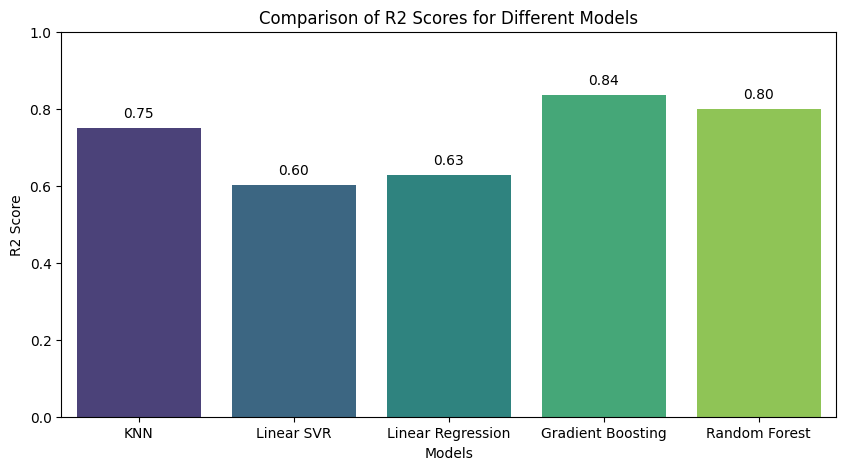

In [ ]:
# Comparison of R2 Scores for Different Models

models = ['KNN','Linear SVR', 'Linear Regression', 'Gradient Boosting', 'Random Forest']
r2_scores = [KNN_r2_score, Linear_SVR_r2_score, Linear_r2_score, XGB_r2_score, Forest_r2_score]  

plt.figure(figsize=(10, 5))
sns.barplot(x = models, y = r2_scores, hue = models, legend = False, palette = 'viridis')

plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores for Different Models')
plt.ylim(0, 1) 

for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha = 'center', va = 'bottom')


plt.show()

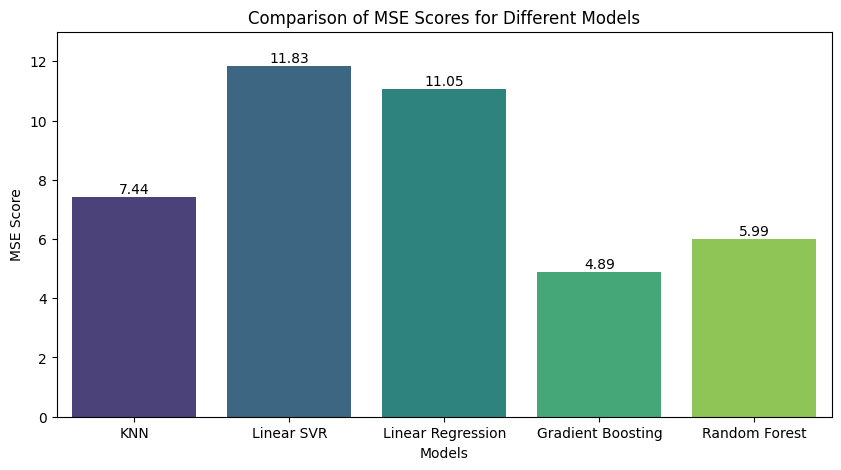

In [ ]:
# Comparison of MSE Scores for Different Models

models = ['KNN','Linear SVR', 'Linear Regression', 'Gradient Boosting', 'Random Forest']
mse_scores = [KNN_MSE, Linear_SVR_MSE, Linear_MSE, XGB_MSE, Forest_MSE]  

plt.figure(figsize=(10, 5))
sns.barplot(x = models, y = mse_scores, hue = models, legend = False, palette = 'viridis')

plt.xlabel('Models')
plt.ylabel('MSE Score')
plt.title('Comparison of MSE Scores for Different Models')
plt.ylim(0, 13) 


for i, score in enumerate(mse_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha = 'center', va = 'bottom')


plt.show()

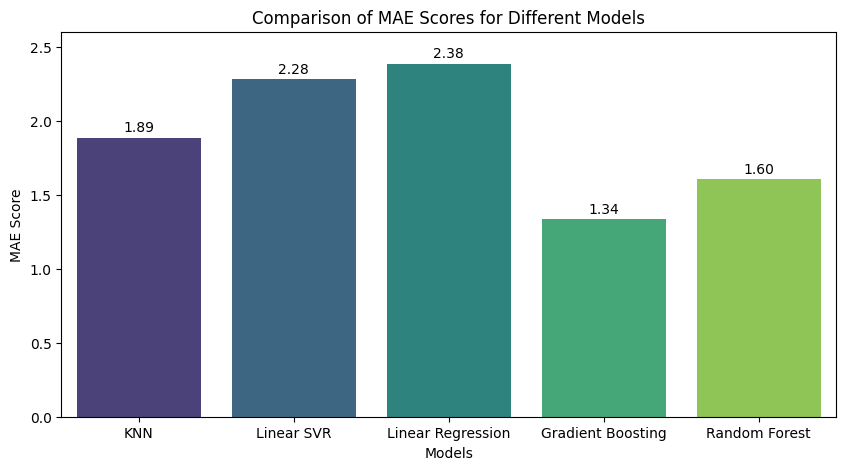

In [ ]:
# Comparison of MAE Scores for Different Models

models = ['KNN','Linear SVR', 'Linear Regression', 'Gradient Boosting', 'Random Forest']
mae_scores = [KNN_MAE, Linear_SVR_MAE, Linear_MAE, XGB_MAE, Forest_MAE] 

plt.figure(figsize=(10, 5))
sns.barplot(x = models, y = mae_scores, hue = models, legend = False, palette = 'viridis')

plt.xlabel('Models')
plt.ylabel('MAE Score')
plt.title('Comparison of MAE Scores for Different Models')
plt.ylim(0, 2.6) 


for i, score in enumerate(mae_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha = 'center', va = 'bottom')

plt.show()

In [54]:
# Saving the best models to files based on results

pickle.dump(Best_XGB_model, open('Trained_models/Taxi.pkl', 'wb'))